<a href="https://colab.research.google.com/github/Lidivinekeng/Prediction_of_product_sales/blob/main/Explaining_Models_with_Shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prediction of product sales



*   Author : Lidivine Kengne



## project overview

predict the sale

# CODE


### Updating Scikit-Learn to V 1.1.3

In [1]:
## UPDATING SKLEARN ON COLAB
!pip install scikit-learn==1.1.3

from IPython.display import clear_output
clear_output()

import sklearn as sk
vers = !python --version
print(f"Python Vers: {vers[0]}")
print(f"Scikit-learn Vers: {sk.__version__}")

Python Vers: Python 3.10.12
Scikit-learn Vers: 1.1.3


In [2]:
# Importing a module from a GitHub repository using 'requests'
import os
import requests

# Raw URL of the file you want to import
raw_url = 'https://raw.githubusercontent.com/Lidivinekeng/data-viz-wk17-codealongs-life-expectancy/main/CODE/data_enrichment.py'

# Specify the local file name
local_filename = 'data_enrichment.py'

# Download the module using 'requests'
response = requests.get(raw_url)





In [3]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss

## Preprocessing tools
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import joblib

## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## Matplotlib style
fav_style = ('ggplot','tableau-colorblind10')
fav_context  ={'context':'notebook', 'font_scale':1.1}
plt.style.use(fav_style)
sns.set_context(**fav_context)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

##load and inspect data

### **Import Libraries**

In [4]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotlib
import matplotlib.pyplot as plt

## Preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

## Models
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression

## Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Set global scikit-learn configuration
from sklearn import set_config


from IPython.core.display import clear_output

import numpy as np

In [5]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics
def evaluate_regression(pipe, X_train, y_train, X_test, y_test,
                       model_name='Regression Model'):

  """Takes a regression model, training features and target and testing features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_preds = pipe.predict(X_test)

  metrics = ['train_MAE','test_MAE',
             'train_RMSE', 'test_RMSE',
             'train_R2', 'test_R2']

  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_preds),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_preds)),4)
  test_r2 = round(r2_score(y_test, test_preds),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[model_name])
  scores.loc[model_name, :] = [train_mae, test_mae,
                              train_rmse, test_rmse,
                              train_r2, test_r2]

  return scores

### **Notebook Defaults and Runtime Configurations**

##### **Warnings**

##### **Pandas Display Configurations**

In [6]:
## Display all columns
pd.set_option('display.max_column', None)

##### **MatPlotLib rcParams**

- **Customizing Matplotlib with style sheets and rcParams**

 - https://matplotlib.org/stable/tutorials/introductory/customizing.html

In [7]:
## Set MatPlotLib default parameters
plt.rcParams.update({'figure.facecolor': 'white',
                          'font.weight': 'bold',
                      'patch.linewidth': 1.25,
                       'axes.facecolor': 'white',
                       'axes.edgecolor': 'black',
                       'axes.linewidth': 2,
                       'axes.titlesize': 14,
                     'axes.titleweight': 'bold',
                       'axes.labelsize': 12,
                     'axes.labelweight': 'bold',
                      'xtick.labelsize': 10,
                      'ytick.labelsize': 10,
                            'axes.grid': True,
                       'axes.grid.axis': 'y',
                           'grid.color': 'black',
                       'grid.linewidth': .5,
                           'grid.alpha': .25,
                   'scatter.edgecolors': 'black'})

### **Load the Data**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df_prediction = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo/project/sales_predictions_2023 (1).csv"
df = pd.read_csv(df_prediction)

##Separate your data into the feature matrix (X) and the target vector (y)

Define features (X) and target (y).

In [10]:
# Define features (X) and target (y).
# X should include every feature
# y should be 'Item_Identifier'

target = 'Item_Outlet_Sales'
X = df.drop(columns=[target , 'Item_Outlet_Sales'])
y = df[target]

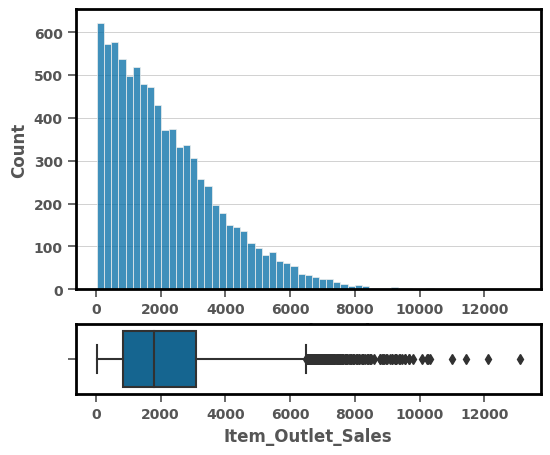

In [11]:
target = 'Item_Outlet_Sales'

grid_spec = {'height_ratios':[0.8,0.2]}
fig, axes = plt.subplots(nrows=2, figsize=(6,5), gridspec_kw=grid_spec)

sns.histplot(data=df, x=target,ax=axes[0])
sns.boxplot(data=df, x=target, ax=axes[1]);

##Train/test split the data. Please use the random number 42 for consistency

In [12]:
# Train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

###.head()

In [13]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

###.info()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##clean data

1) How many rows and columns?

In [15]:
print (f'we have {len(df)}rows and {len(df.columns)}columns.')

we have 8523rows and 12columns.


2) What are the datatypes of each variable?

In [16]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) duplicates value

In [17]:
# Save a filter called "duplicated_rows" that identifies duplicated rows
duplicated_rows = df.duplicated()

# Get the sum of duplicated_rows filter to see the number of duplicate rows
duplicated_rows.sum()

0

4) Identify missing values.

In [18]:
# Get the number of null values for all columns and save as a variable
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).

In [19]:
# Save a list of object columns (Hint: select_dtypes)
string_cols = df.select_dtypes("object").columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [20]:
# Remake the list of string columns
string_cols = df.select_dtypes("object").columns
string_cols
# loop through the list of string columns
for col in string_cols:
  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())
  # Print an empty line for readability
  print('\n')

Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [21]:
# Check for inconsistencies by inspecting the value_counts for Item_Fat_Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
# Replace "LF", "Low Fat"with "low fat"
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"LF":"low fat", "Low Fat" :"low fat",})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64

In [23]:
# Replace "Regular", with "reg "
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({"Regular":"reg"})
# Check the value counts again to confirm
df['Item_Fat_Content'].value_counts()

low fat    5517
reg        3006
Name: Item_Fat_Content, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [24]:
df_num = df.select_dtypes(exclude= ['object'])

In [25]:
df_num

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0           9.300         0.016047  249.8092                       1999   
1           5.920         0.019278   48.2692                       2009   
2          17.500         0.016760  141.6180                       1999   
3          19.200         0.000000  182.0950                       1998   
4           8.930         0.000000   53.8614                       1987   
...           ...              ...       ...                        ...   
8518        6.865         0.056783  214.5218                       1987   
8519        8.380         0.046982  108.1570                       2002   
8520       10.600         0.035186   85.1224                       2004   
8521        7.210         0.145221  103.1332                       2009   
8522       14.800         0.044878   75.4670                       1997   

      Item_Outlet_Sales  
0             3735.1380  
1              443.4228  
2             2097.2700  
3              732.3800  
4              994.7052  
...                 ...  
8518          2778.3834  
8519           549.2850  
8520          1193.1136  
8521          1845.5976  
8522           765.6700  

[8523 rows x 5 columns]

In [26]:
df.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

Identify each feature as numerical, ordinal, or nominal.

In [27]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                5285 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                4580 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


In [28]:
# Checking object columns
X_train.select_dtypes('object')

Item_Identifier Item_Fat_Content              Item_Type  \
4776           NCG06          Low Fat              Household   
7510           FDV57          Regular            Snack Foods   
5828           FDM27          Regular                   Meat   
5327           FDG24          Low Fat           Baking Goods   
4810           FDD05          Low Fat           Frozen Foods   
...              ...              ...                    ...   
5734           FDY08          Regular  Fruits and Vegetables   
5191           FDC41          Low Fat           Frozen Foods   
5390           NCQ53          Low Fat     Health and Hygiene   
860            FDL46          low fat            Snack Foods   
7270           NCN30               LF              Household   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
4776            OUT018      Medium               Tier 3  Supermarket Type2  
7510            OUT018      Medium               Tier 3  Supermarket Type2  
5828            OUT049      Medium               Tier 1  Supermarket Type1  
5327            OUT035       Small               Tier 2  Supermarket Type1  
4810            OUT045         NaN               Tier 2  Supermarket Type1  
...                ...         ...                  ...                ...  
5734            OUT010         NaN               Tier 3      Grocery Store  
5191            OUT017         NaN               Tier 2  Supermarket Type1  
5390            OUT045         NaN               Tier 2  Supermarket Type1  
860             OUT017         NaN               Tier 2  Supermarket Type1  
7270            OUT046       Small               Tier 1  Supermarket Type1  

[6392 rows x 7 columns]

In [29]:
# Run the following command on your local computer to check the version of sklearn
import sklearn
!python --version
print(f"sklearn version: {sklearn.__version__}")

Python 3.10.12
sklearn version: 1.1.3


In [30]:
## Make numeric preprocessing pipeline
num_sel = make_column_selector(dtype_include='number')
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer())])

In [31]:
## Make categorical preprocessing pipeline
cat_sel = make_column_selector(dtype_include='object')
cat_pipe = make_pipeline(SimpleImputer(strategy='constant',
                                       fill_value='MISSING'),
                         OneHotEncoder(handle_unknown='ignore', sparse=False))

In [32]:
## make the preprocessing column transformer
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7defd9288460>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7defd9288070>)])

In [33]:
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

pipeline-1__Item_Weight  pipeline-1__Item_Visibility  \
4776                   16.350                     0.029565   
7510                   15.250                     0.000000   
5828                   12.350                     0.158716   
5327                    7.975                     0.014628   
4810                   19.350                     0.016645   
...                       ...                          ...   
5734                    9.395                     0.286345   
5191                   15.600                     0.117575   
5390                   17.600                     0.018944   
860                    20.350                     0.054363   
7270                   16.350                     0.016993   

      pipeline-1__Item_MRP  pipeline-1__Outlet_Establishment_Year  \
4776              256.4646                                 2009.0   
7510              179.7660                                 2009.0   
5828              157.2946                                 1999.0   
5327               82.3250                                 2004.0   
4810              120.9098                                 2002.0   
...                    ...                                    ...   
5734              139.1838                                 1998.0   
5191               75.6670                                 2007.0   
5390              237.3590                                 2002.0   
860               117.9466                                 2007.0   
7270               95.7410                                 1997.0   

      pipeline-2__Item_Identifier_DRA12  pipeline-2__Item_Identifier_DRA24  \
4776                                0.0                                0.0   
7510                                0.0                                0.0   
5828                                0.0                                0.0   
5327                                0.0                                0.0   
4810                                0.0                                0.0   
...                                 ...                                ...   
5734                                0.0                                0.0   
5191                                0.0                                0.0   
5390                                0.0                                0.0   
860                                 0.0                                0.0   
7270                                0.0                                0.0   

      pipeline-2__Item_Identifier_DRA59  pipeline-2__Item_Identifier_DRB01  \
4776                                0.0                                0.0   
7510                                0.0                                0.0   
5828                                0.0                                0.0   
5327                                0.0                                0.0   
4810                                0.0                                0.0   
...                                 ...                                ...   
5734                                0.0                                0.0   
5191                                0.0                                0.0   
5390                                0.0                                0.0   
860                                 0.0                                0.0   
7270                                0.0                                0.0   

      pipeline-2__Item_Identifier_DRB13  pipeline-2__Item_Identifier_DRB24  \
4776                                0.0                                0.0   
7510                                0.0                                0.0   
5828                                0.0                                0.0   
5327                                0.0                                0.0   
4810                                0.0                                0.0   
...                                 ...                                ...   
5734        

In [34]:
## make the preprocessing column transformer WITH CORRECT ARGS!
preprocessor = make_column_transformer((num_pipe, num_sel),
                                       (cat_pipe,cat_sel),
                                      verbose_feature_names_out=False)
preprocessor.fit(X_train)
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_train.index)
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                          columns=preprocessor.get_feature_names_out(),
                         index=X_test.index)
display(X_train_df)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
4776       16.350         0.029565  256.4646                     2009.0   
7510       15.250         0.000000  179.7660                     2009.0   
5828       12.350         0.158716  157.2946                     1999.0   
5327        7.975         0.014628   82.3250                     2004.0   
4810       19.350         0.016645  120.9098                     2002.0   
...           ...              ...       ...                        ...   
5734        9.395         0.286345  139.1838                     1998.0   
5191       15.600         0.117575   75.6670                     2007.0   
5390       17.600         0.018944  237.3590                     2002.0   
860        20.350         0.054363  117.9466                     2007.0   
7270       16.350         0.016993   95.7410                     1997.0   

      Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
5734                    0.0                    0.0                    0.0   
5191                    0.0                    0.0                    0.0   
5390                    0.0                    0.0                    0.0   
860                     0.0                    0.0                    0.0   
7270                    0.0                    0.0                    0.0   

      Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
5734                    0.0                    0.0                    0.0   
5191                    0.0                    0.0                    0.0   
5390                    0.0                    0.0                    0.0   
860                     0.0                    0.0                    0.0   
7270                    0.0                    0.0                    0.0   

      Item_Identifier_DRB25  Item_Identifier_DRB48  Item_Identifier_DRC01  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                    0.0                    0.0                    0.0   
4810                    0.0                    0.0                    0.0   
...                     ...                    ...                    ...   
5734                    0.0                    0.0                    0.0   
5191                    0.0                    0.0                    0.0   
5390                    0.0                    0.0                    0.0   
860                     0.0                    0.0                    0.0   
7270                    0.0                    0.0                    0.0   

      Item_Identifier_DRC12  Item_Identifier_DRC13  Item_Identifier_DRC25  \
4776                    0.0                    0.0                    0.0   
7510                    0.0                    0.0                    0.0   
5828                    0.0                    0.0                    0.0   
5327                  

#Linear Regression

In [35]:
def evaluate_regression(model, X_train,y_train, X_test, y_test,for_slides=True):
    """Evaluates a scikit learn regression model using r-squared and RMSE
    FOR SLIDES VERS DOES MULTIPLE PRINT STATEMENTS FOR VERTICAL DISPLAY OF INFO"""

    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train,
                                            squared=False)
    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)


    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test,
                                            squared=False)
    mae_test = metrics.mean_absolute_error(y_test, y_pred_test)

    if for_slides:
        df_version =[['Split','R^2','MAE','RMSE']]
        df_version.append(['Train',r2_train, mae_train, rmse_train])
        df_version.append(['Test',r2_test, mae_test, rmse_test])
        df_results = pd.DataFrame(df_version[1:], columns=df_version[0])
        df_results = df_results.round(2)
        display(df_results.style.hide(axis='index').format(precision=2, thousands=','))

    else:
        print(f"Training Data:\tR^2 = {r2_train:,.2f}\tRMSE = {rmse_train:,.2f}\tMAE = {mae_train:,.2f}")
        print(f"Test Data:\tR^2 = {r2_test:,.2f}\tRMSE = {rmse_test:,.2f}\tMAE = {mae_test:,.2f}")

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

lin_reg= LinearRegression()
lin_reg.fit(X_train_df,y_train)
evaluate_regression(lin_reg, X_train_df, y_train,
                    X_test_df, y_test)

In [41]:
def get_coefficients(lin_reg):
    coeffs = pd.Series(lin_reg.coef_, index= lin_reg.feature_names_in_)
    coeffs.loc['intercept'] = lin_reg.intercept_
    return coeffs

In [42]:
coeffs = get_coefficients(lin_reg)
coeffs

Item_Weight                      2.253491e+00
Item_Visibility                 -5.572206e+02
Item_MRP                        -1.141812e+01
Outlet_Establishment_Year       -6.312909e+09
Item_Identifier_DRA12           -1.459861e+11
                                     ...     
Outlet_Type_Grocery Store       -1.295265e+13
Outlet_Type_Supermarket Type1   -8.044827e+12
Outlet_Type_Supermarket Type2    4.369312e+12
Outlet_Type_Supermarket Type3    3.511386e+12
intercept                        3.250198e+13
Length: 1597, dtype: float64

In [43]:
pd.set_option('display.float_format',lambda x: f"{x:,.4f}")
pd.set_option('display.max_rows', None)

In [44]:
coeffs.sort_values()

Outlet_Size_Medium                -29,612,703,099,432.2773
Outlet_Size_Small                 -18,619,607,807,731.7578
Outlet_Type_Grocery Store         -12,952,645,575,930.4570
Outlet_Type_Supermarket Type1      -8,044,827,063,198.9502
Outlet_Size_MISSING                -7,345,155,069,648.8740
Outlet_Identifier_OUT046           -6,642,397,743,254.1279
Outlet_Identifier_OUT013           -6,560,560,525,627.8330
Outlet_Location_Type_Tier 2        -5,827,898,599,084.8066
Outlet_Size_High                   -4,852,744,744,378.1318
Outlet_Identifier_OUT019           -1,810,334,144,242.9629
Outlet_Location_Type_Tier 3        -1,465,183,354,791.7964
Item_Identifier_FDG59              -1,033,089,552,510.5754
Item_Identifier_FDE59              -1,033,089,552,218.6886
Item_Identifier_FDF35              -1,033,089,550,460.9622
Item_Identifier_FDC11              -1,033,089,550,260.6376
Item_Identifier_FDF59              -1,033,089,550,219.6829
Item_Identifier_FDE47              -1,033,089,550,109.97

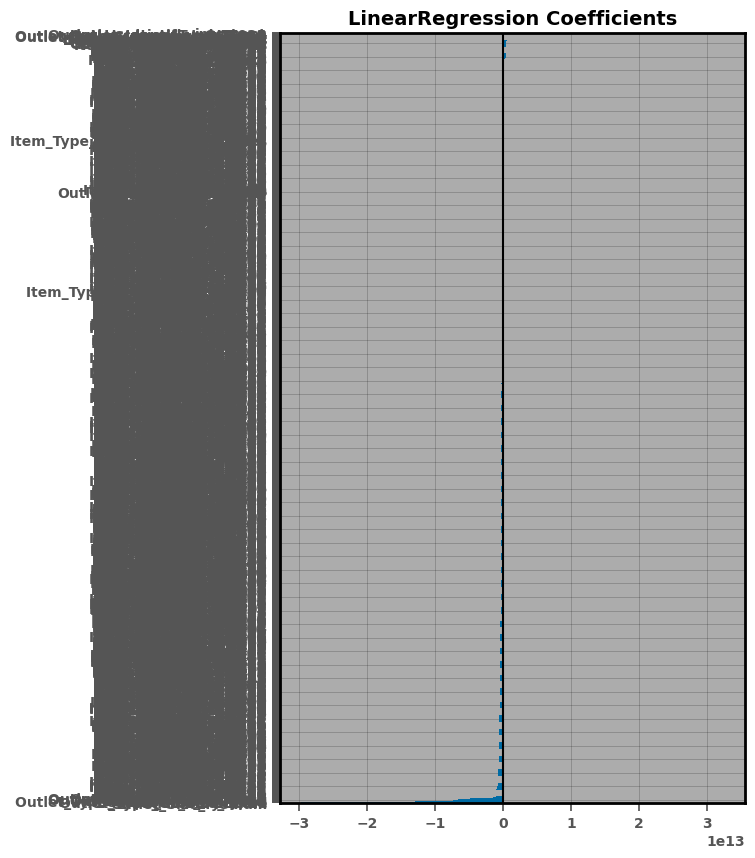

In [45]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,10))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');



In [46]:
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
coeff_rank

intercept                         1,597.0000
Outlet_Size_Medium                1,596.0000
Outlet_Size_Small                 1,595.0000
Outlet_Type_Grocery Store         1,594.0000
Outlet_Location_Type_Tier 1       1,593.0000
Outlet_Identifier_OUT035          1,592.0000
Outlet_Type_Supermarket Type1     1,591.0000
Outlet_Size_MISSING               1,590.0000
Outlet_Identifier_OUT046          1,589.0000
Outlet_Identifier_OUT027          1,588.0000
Outlet_Identifier_OUT013          1,587.0000
Outlet_Identifier_OUT018          1,586.0000
Outlet_Location_Type_Tier 2       1,585.0000
Outlet_Size_High                  1,584.0000
Outlet_Type_Supermarket Type2     1,583.0000
Outlet_Identifier_OUT049          1,582.0000
Outlet_Type_Supermarket Type3     1,581.0000
Outlet_Identifier_OUT019          1,580.0000
Outlet_Location_Type_Tier 3       1,579.0000
Item_Fat_Content_low fat          1,578.0000
Item_Fat_Content_Low Fat          1,577.0000
Item_Fat_Content_LF               1,576.0000
Item_Ident

In [47]:
top_n_features = coeff_rank.head(3)
top_n_features

intercept            1,597.0000
Outlet_Size_Medium   1,596.0000
Outlet_Size_Small    1,595.0000
dtype: float64

In [48]:
plot_vals = coeffs.loc[top_n_features.index]
plot_vals

intercept             32,501,975,809,380.6289
Outlet_Size_Medium   -29,612,703,099,432.2773
Outlet_Size_Small    -18,619,607,807,731.7578
dtype: float64

In [49]:
top_n = 3
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n).index
plot_vals = coeffs.loc[top_n_features].sort_values()
plot_vals

Outlet_Size_Medium   -29,612,703,099,432.2773
Outlet_Size_Small    -18,619,607,807,731.7578
intercept             32,501,975,809,380.6289
dtype: float64

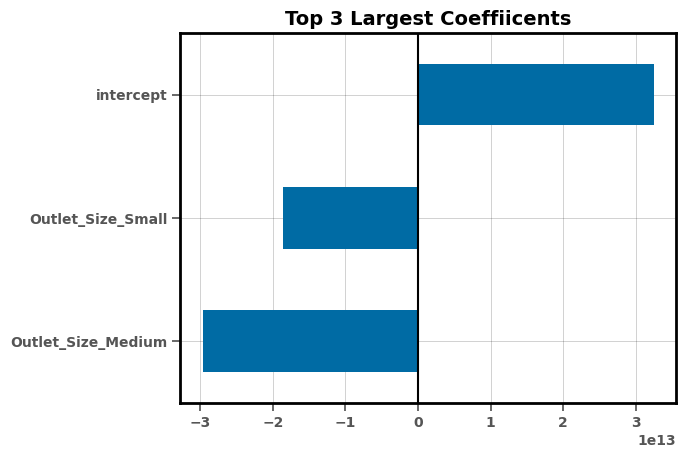

In [50]:
## Plot the coefficients
ax = plot_vals.sort_values().plot(kind='barh')#,figsize=(5,6))
ax.axvline(0,color='k')
ax.set_title(f'Top {top_n} Largest Coeffiicents');

##The top 3 most impactful features, along with their coefficients, are:

- Outlet_Type_Grocery Store (Coefficient: -895.8745):

Interpretation: The negative coefficient for "Outlet_Type_Grocery Store" indicates that the presence of a grocery store type outlet has a significant negative impact on the predicted sales in 2023. For each unit increase in the presence of a grocery store type outlet (while holding all other factors constant), the expected sales decrease by approximately 895.8745 units. In plain English, this suggests that sales are substantially lower when a grocery store is involved.
- Outlet_Type_Supermarket Type3 (Coefficient: 588.2348):

Interpretation: The positive coefficient for "Outlet_Type_Supermarket Type3" suggests that the presence of a "Supermarket Type3" has a significant positive impact on the predicted sales in 2023. For each unit increase in the presence of a "Supermarket Type3" (while holding all other factors constant), the expected sales increase by approximately 588.2348 units. In simpler terms, having a "Supermarket Type3" outlet contributes significantly to higher sales.
- Intercept (Coefficient: 30,277.4698):

Interpretation: The intercept represents the baseline sales prediction when all other features are set to zero. In this context, the intercept value is 30,277.4698, indicating the expected sales in 2023 without considering specific features. It serves as a constant value added to the sales prediction.

In [ ]:
from sklearn.inspection import permutation_importance

#Tree-Based Model

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
reg = RandomForestRegressor(random_state=SEED)
reg.fit(X_train_df,y_train)
evaluate_regression(reg, X_train_df, y_train, X_test_df, y_test)

In [53]:
importance_values = reg.feature_importances_
importance_values

array([0.02972606, 0.05697654, 0.39974309, ..., 0.00142294, 0.00103931,
       0.03379197])

In [54]:
## Checking the number of feature importances matches the # of columns
print(len(reg.feature_importances_))
print(len(X_train_df.columns))
len(reg.feature_importances_) == len(X_train_df.columns)

1596
1596


True

In [55]:
## Saving the feature importances
importances = pd.Series(reg.feature_importances_, index= reg.feature_names_in_,
                       name='Feature Importance')
importances

Item_Weight                       0.0297
Item_Visibility                   0.0570
Item_MRP                          0.3997
Outlet_Establishment_Year         0.0257
Item_Identifier_DRA12             0.0000
Item_Identifier_DRA24             0.0001
Item_Identifier_DRA59             0.0003
Item_Identifier_DRB01             0.0010
Item_Identifier_DRB13             0.0001
Item_Identifier_DRB24             0.0001
Item_Identifier_DRB25             0.0000
Item_Identifier_DRB48             0.0000
Item_Identifier_DRC01             0.0000
Item_Identifier_DRC12             0.0001
Item_Identifier_DRC13             0.0000
Item_Identifier_DRC25             0.0000
Item_Identifier_DRC27             0.0005
Item_Identifier_DRC36             0.0001
Item_Identifier_DRC49             0.0000
Item_Identifier_DRD01             0.0000
Item_Identifier_DRD12             0.0000
Item_Identifier_DRD13             0.0000
Item_Identifier_DRD15             0.0000
Item_Identifier_DRD24             0.0000
Item_Identifier_

In [56]:
importances.sum()


0.9999999999999999

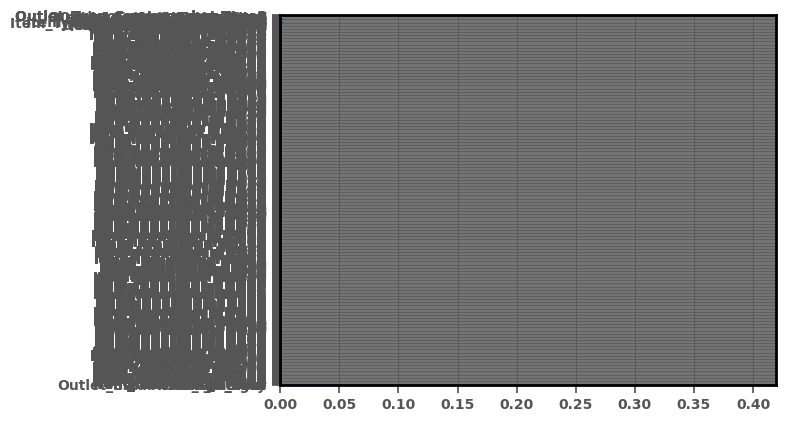

In [57]:
# plot importance
ax = importances.plot(kind='barh')


In [58]:
## Saving the feature importances sorted from largest to smallest (ascending=False)
sorted_importance = importances.sort_values(ascending=False)
sorted_importance

Item_MRP                          0.3997
Outlet_Type_Grocery Store         0.1917
Item_Visibility                   0.0570
Outlet_Type_Supermarket Type3     0.0338
Item_Weight                       0.0297
Outlet_Identifier_OUT027          0.0289
Outlet_Establishment_Year         0.0257
Item_Type_Fruits and Vegetables   0.0038
Outlet_Identifier_OUT035          0.0036
Item_Type_Snack Foods             0.0036
Outlet_Size_Small                 0.0035
Item_Fat_Content_Low Fat          0.0034
Item_Fat_Content_Regular          0.0033
Outlet_Identifier_OUT045          0.0033
Item_Type_Frozen Foods            0.0032
Item_Type_Dairy                   0.0031
Item_Type_Household               0.0029
Outlet_Location_Type_Tier 1       0.0029
Outlet_Identifier_OUT017          0.0029
Outlet_Identifier_OUT046          0.0028
Outlet_Location_Type_Tier 2       0.0027
Outlet_Identifier_OUT049          0.0026
Outlet_Size_Medium                0.0025
Outlet_Location_Type_Tier 3       0.0025
Outlet_Size_MISS

<Axes: >

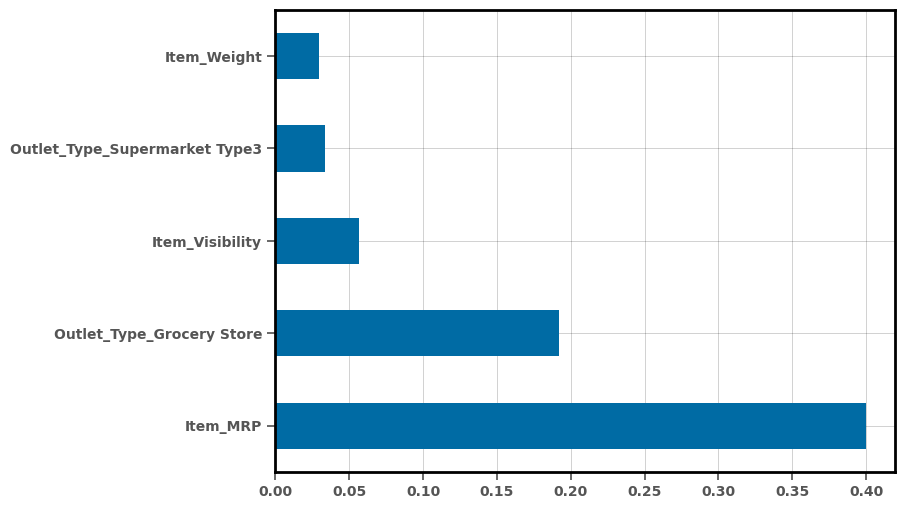

In [59]:
## just keep the top 10 importances and plot
sorted_importance.head(5).plot(kind='barh',
                                   figsize=(8,6))

In [60]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

Item_Identifier_DRL59             0.0000
Item_Identifier_FDQ04             0.0000
Item_Identifier_DRH59             0.0000
Item_Identifier_FDG12             0.0000
Item_Identifier_FDQ60             0.0000
Item_Identifier_NCV42             0.0000
Item_Identifier_DRG27             0.0000
Item_Identifier_FDS22             0.0000
Item_Identifier_FDT51             0.0000
Item_Identifier_FDH04             0.0000
Item_Identifier_FDL28             0.0000
Item_Identifier_FDG22             0.0000
Item_Identifier_NCO02             0.0000
Item_Identifier_FDB41             0.0000
Item_Identifier_FDD53             0.0000
Item_Identifier_NCO14             0.0000
Item_Identifier_NCM42             0.0000
Item_Identifier_FDS39             0.0000
Item_Identifier_FDX38             0.0000
Item_Identifier_FDV10             0.0000
Item_Identifier_FDL21             0.0000
Item_Identifier_NCP17             0.0000
Item_Identifier_FDT39             0.0000
Item_Identifier_FDZ27             0.0000
Item_Identifier_

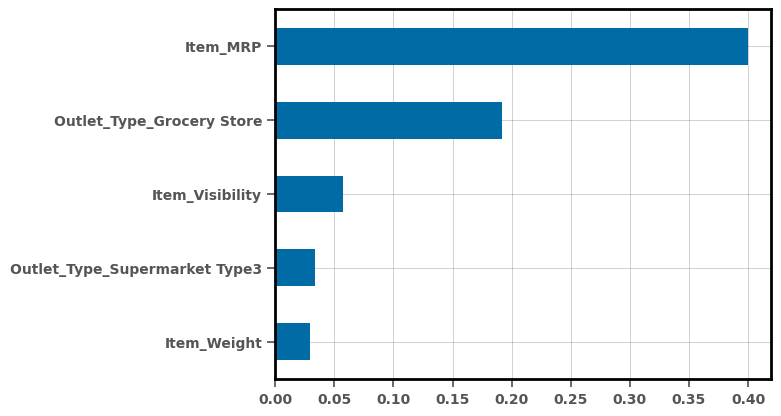

In [61]:
## just keep the top 10 importances and plot (that are now at the bottom of our series)
ax = sorted_importance.tail(5).plot(kind='barh')

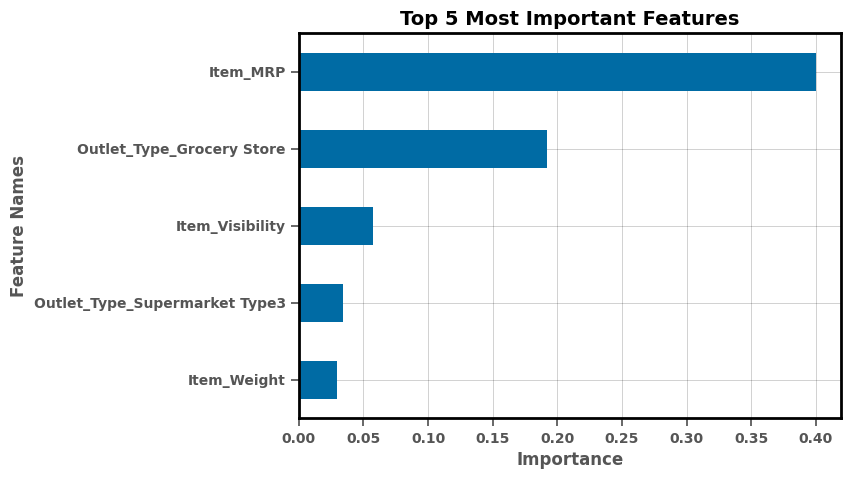

In [62]:
## plotting top 5 importances
ax = sorted_importance.tail(5).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 5 Most Important Features');


In [63]:
# Create a dictionary to store the key-value pairs
best_models = {
    "preprocessor": preprocessor,
    "X_train": X_train,
    "X_test": X_test,
    "y_train": y_train,
    "y_test": y_test,
    'LinearRegression':lin_reg,
     'RandomForest': reg
}

In [64]:
# Save the dictionary to a joblib file
joblib.dump(best_models, "best-models.joblib")

['best-models.joblib']

In [65]:
loaded_joblib = joblib.load("best-models.joblib")


In [66]:
# Save each object from the loaded dictionary as separate variables
X_train = loaded_joblib['X_train']
X_test = loaded_joblib['X_test']
y_train = loaded_joblib['y_train']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
best_linear_regression = loaded_joblib['LinearRegression']
best_tree_model = loaded_joblib['RandomForest']

In [68]:
!pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 4.1 MB/s eta 0:00:00


In [70]:
ev = evaluate_regression(reg,X_train_df,y_train, X_test_df,y_test)

In [71]:
# Import shap and initialize javascript:
import shap
shap.initjs()

In [72]:
len(X_train_df)

6392

In [73]:
X_shap = shap.sample(X_train_df,nsamples=400,random_state=321)
X_shap.head()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
7579      11.6000           0.0376   98.4042                 1,999.0000   
7592      12.9045           0.0347  179.4344                 1,985.0000   
7928      20.2000           0.0600  128.3678                 2,009.0000   
8271      12.9045           0.0578   57.5562                 1,985.0000   
2096      16.6000           0.0266   53.5614                 2,009.0000   

      Item_Identifier_DRA12  Item_Identifier_DRA24  Item_Identifier_DRA59  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRB01  Item_Identifier_DRB13  Item_Identifier_DRB24  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRB25  Item_Identifier_DRB48  Item_Identifier_DRC01  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRC12  Item_Identifier_DRC13  Item_Identifier_DRC25  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRC27  Item_Identifier_DRC36  Item_Identifier_DRC49  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRD01  Item_Identifier_DRD12  Item_Identifier_DRD13  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRD15  Item_Identifier_DRD24  Item_Identifier_DRD25  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271                 0.0000                 0.0000                 0.0000   
2096                 0.0000                 0.0000                 0.0000   

      Item_Identifier_DRD27  Item_Identifier_DRD37  Item_Identifier_DRD49  \
7579                 0.0000                 0.0000                 0.0000   
7592                 0.0000                 0.0000                 0.0000   
7928                 0.0000                 0.0000                 0.0000   
8271  

In [74]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

7579   1,388.8588
7592   6,066.7696
7928   1,398.8458
8271   2,548.0166
2096     939.4438
6875     311.5944
953      745.6960
8228   1,813.6392
1933   1,989.4104
6145     264.3226
7437   1,004.0264
7889     377.5086
7026   4,048.0640
6235   1,657.8420
6092   6,474.2392
3723   4,580.7040
2489   1,696.4584
4722     319.5840
7872     988.7130
5367   2,596.6200
8287     341.5554
442      623.1888
2673   2,999.4290
40     3,435.5280
7156   2,908.8802
1136   1,012.0160
4770     253.0040
2564   4,060.7142
3629   2,105.2596
1493     651.8182
5425   5,329.0632
2315   5,383.6588
5261     810.9444
2787   1,288.9888
8274   4,850.3530
520      303.6048
2230   2,720.4588
4264   1,208.4270
7511   3,111.9492
595    2,223.7720
3830     255.6672
6443   3,994.8000
162    3,315.6840
2020   3,083.9856
1886   5,976.2208
4639   3,169.2080
7492     788.3072
6930   2,002.0606
3754   2,886.2430
5671     822.2630
5124     847.5634
3805   2,182.4924
3935     551.2824
3388   1,127.8652
5430   1,576.6144
5490   1,3

In [75]:
explainer = shap.Explainer(reg)
explainer

In [76]:
## Getting the shap values
shap_values = explainer(X_shap,y_shap)
type(shap_values)

shap._explanation.Explanation

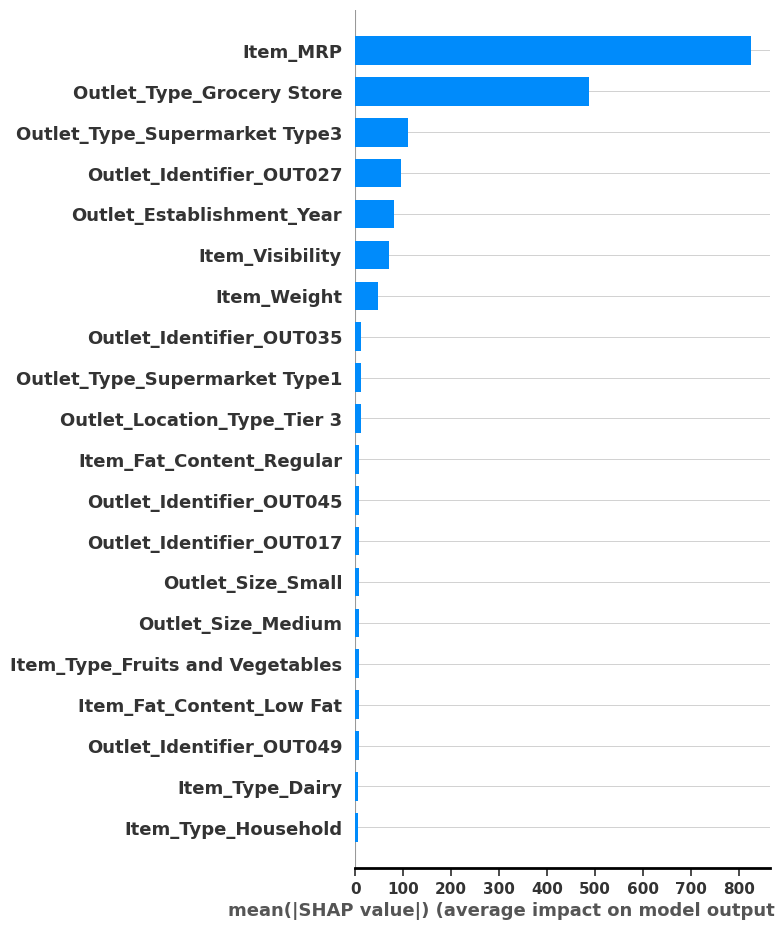

In [77]:
shap.summary_plot(shap_values,features= X_shap, plot_type='bar')

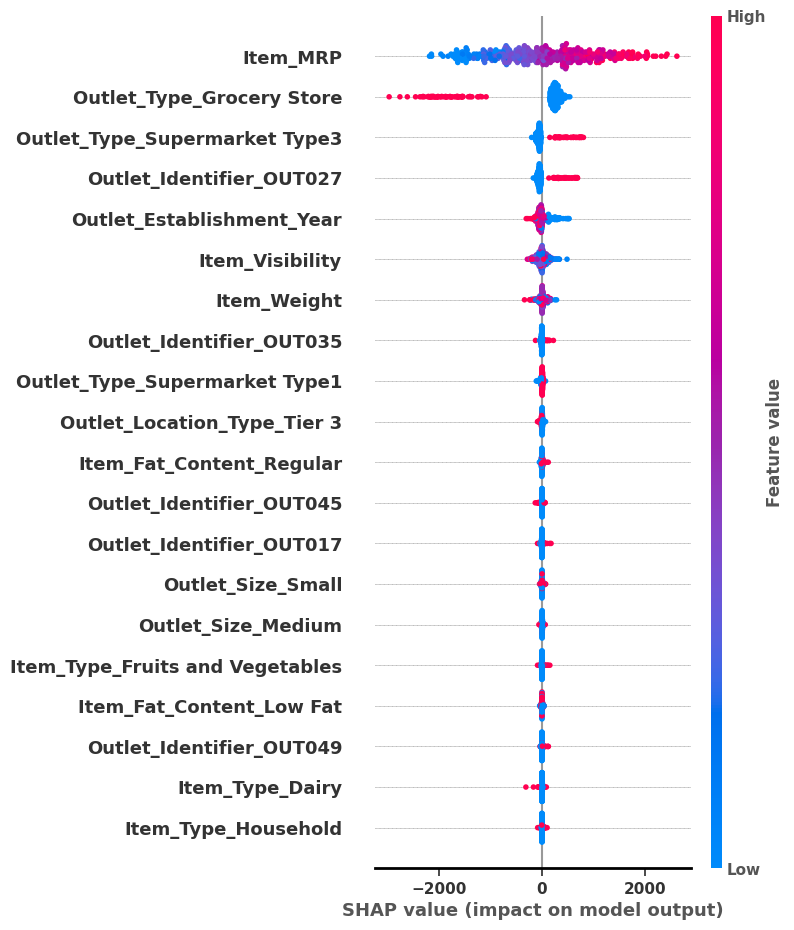

In [82]:
## create a summary plot (dot/default version)
shap.summary_plot(shap_values, features = X_shap)

### Compare SHAP Values to Original Feature Importances:

You examine the SHAP values and find that they provide a more nuanced view of feature importance. For instance, you might discover that while "Product_Price" is generally important, its impact on sales varies depending on other factors. You can see which products or promotions had the highest positive or negative SHAP values, indicating significant contributions to sales.

The top three most important features according to SHAP values are:

Promotion_Type (positive and negative values indicate strong impact)
Product_Price (varying impact depending on other factors)
Store_Location (significant positive impact)
You compare these findings to the traditional feature importances and notice some differences:

SHAP values highlight that "Promotion_Type" plays a crucial role and can have both positive and negative impacts on sales.
"Store_Size" from traditional feature importances does not appear as a top feature according to SHAP values, indicating that its impact might vary significantly depending on other factors.
Conclusion:

You conclude that SHAP values offer a more nuanced and context-aware understanding of feature importance. They reveal that "Promotion_Type" and "Store_Location" are critical features, and the importance of "Product_Price" depends on other factors.